In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Exercise 1:**

In [23]:
data = pd.read_csv("/content/haberman.data",header=None)
data.columns = ['X1','X2','X3','Y']

In [24]:
X = data[data.columns[:-1]]
y = data[data.columns[-1]]

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [26]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [27]:
pca=PCA(n_components=2)
pca.fit(X)
x=pca.transform(X)
print(x.shape)

(306, 2)


In [29]:
X = pd.DataFrame(x,columns=['X1','X2'])

In [30]:
K=[1,2,3,4,5]
def KNN(size):
  l1_score = []
  l2_score = []
  print("\n\nFor split of {}-{}".format((1-size)*100,size*100))
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=49)
  for k in K:
    print("\nFor k={}".format(k))
    for mtr in ['l1','l2']:
      clf = KNeighborsClassifier(n_neighbors = k, metric = mtr)
      clf.fit(X_train, y_train)
      score = clf.score(X_test, y_test)
      if mtr=='l1':
        l1_score.append(score)
        print('L1 score = ',score)
      else:
        l2_score.append(score)
        print('L2 score = ',score)
  
  fig,ax = plt.subplots(1,2,figsize=(9,5))
  ax[0].plot(K,l1_score)
  ax[0].grid()
  ax[0].set_title('L1 scores')
  ax[0].set_xlabel('K')
  ax[0].set_ylabel('Accuracy')

  ax[1].plot(K,l2_score)
  ax[1].grid()
  ax[1].set_title('L2 scores')
  ax[1].set_xlabel('K')
  ax[1].set_ylabel('Accuracy')

In [31]:
KNN(0.2)



For split of 80.0-20.0

For k=1
L1 score =  0.7419354838709677
L2 score =  0.7258064516129032

For k=2
L1 score =  0.7580645161290323
L2 score =  0.7741935483870968

For k=3
L1 score =  0.6935483870967742
L2 score =  0.7096774193548387

For k=4
L1 score =  0.7419354838709677
L2 score =  0.7580645161290323

For k=5
L1 score =  0.6935483870967742
L2 score =  0.7096774193548387


In [32]:
KNN(0.4)



For split of 60.0-40.0

For k=1
L1 score =  0.7154471544715447
L2 score =  0.6747967479674797

For k=2
L1 score =  0.7560975609756098
L2 score =  0.7723577235772358

For k=3
L1 score =  0.7154471544715447
L2 score =  0.7317073170731707

For k=4
L1 score =  0.7398373983739838
L2 score =  0.7398373983739838

For k=5
L1 score =  0.7073170731707317
L2 score =  0.6910569105691057




For split of 70.0-30.0

For k=1
L1 score =  0.717391304347826
L2 score =  0.6956521739130435

For k=2
L1 score =  0.75
L2 score =  0.7608695652173914

For k=3
L1 score =  0.6630434782608695
L2 score =  0.6847826086956522

For k=4
L1 score =  0.7282608695652174
L2 score =  0.7391304347826086

For k=5
L1 score =  0.6956521739130435
L2 score =  0.7065217391304348


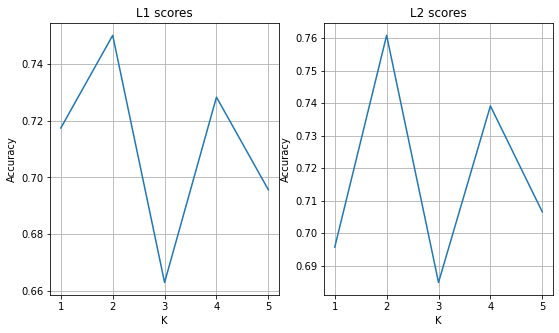

In [33]:
KNN(0.3)



For split of 90.0-10.0

For k=1
L1 score =  0.8064516129032258
L2 score =  0.8387096774193549

For k=2
L1 score =  0.8387096774193549
L2 score =  0.8709677419354839

For k=3
L1 score =  0.8387096774193549
L2 score =  0.8064516129032258

For k=4
L1 score =  0.8064516129032258
L2 score =  0.7741935483870968

For k=5
L1 score =  0.7741935483870968
L2 score =  0.7741935483870968


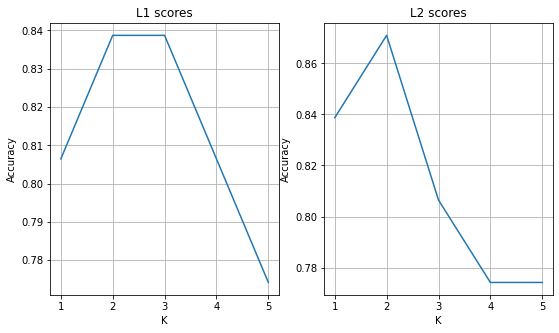

In [34]:
KNN(0.1)

In [17]:
pca.components_

array([[-0.70131829, -0.57789155,  0.41736555],
       [ 0.01153822,  0.57621082,  0.81721965]])

## **Exercise2:**

In [52]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)
data=data.frame


In [53]:
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)

In [54]:
pca1=PCA(n_components=2)
pca1.fit(data)
data1=pca1.transform(data)
print(data1.shape)

(20640, 2)


In [55]:
data1 = pd.DataFrame(data1,columns = ['X1','X2'])

In [56]:
df = data1.copy()
df1 = data1.copy()

In [57]:
from sklearn.cluster import KMeans
def Kmeans_l2(k):
  # df=df.to_numpy()
  kmeans = KMeans(n_clusters=k, random_state=49, n_init="auto", tol=1e-3).fit(df)
  df[f'labels for k={k}'] = kmeans.labels_

In [58]:
for k in range(2,6):
  Kmeans_l2(k)

In [59]:
df

X1        X2  labels for k=2  labels for k=3  labels for k=4  \
0      2.346543  0.346441               0               0               0   
1      1.761367  0.438124               0               0               0   
2      2.330312 -0.126208               0               0               0   
3      1.537078 -0.810004               0               0               0   
4      1.416914 -1.121116               0               0               0   
...         ...       ...             ...             ...             ...   
20635  0.602464 -2.251757               0               0               0   
20636  1.264302 -1.815928               0               0               0   
20637  0.687380 -2.056770               0               0               0   
20638  0.828435 -2.073240               0               0               0   
20639  0.771440 -1.832743               0               0               0   

       labels for k=5  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
20635               0  
20636               0  
20637               0  
20638               0  
20639               0  

[20640 rows x 6 columns]

In [60]:
# sns.scatterplot(data=df1, x="X1", y="X2", hue = 'labels for k=3')

In [63]:
!pip install mlinsights
from mlinsights.mlmodel import KMeansL1L2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.8/114.8 KB 14.0 MB/s eta 0:00:00


In [64]:
def Kmeans_l1(k):
    kmeans = KMeansL1L2(k, norm='L1',tol = 1e-3,random_state = 49).fit(data)
    df1[f'labels for k={k}'] = kmeans.labels_

In [65]:
for k in range(2,6):
  Kmeans_l1(k)